För G:
1. Ladda ner ett eller flera dataset som visar GDP, GDP per capita och förväntad livslängd.
2. Visa hur förväntad livslängd och GDP per capita hänger ihop. Välj själv och motivera hur detta ska visualiseras.
3. Resonera kortfattat om resultaten verkar rimliga och fundera på om det finns någon orsak bakom ditt resultat.

Svara nu på dessa frågor:
4. Gjorde du någon Data Cleaning? Förklara vad du har gjort och motivera detta.
5. Vilka länder har förväntad livslängd en standardavvikelse över medelvärdet?
6. Vilka länder har hög förväntad livslängd men låg GDP/GDP per capita?
7. Har varje stor ekonomi (GDP) lång förväntad livslängd?
8. Om du ändrar definitionen av en stor ekonomi till GDP per capita. Hur förändras resultatet då? Diskutera kort resultatet i 7 och 8.


In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

gdp_data = pd.read_csv("gdp.csv")
life_expectancy_data = pd.read_csv("Life-Expectancy-Data-Updated.csv")

In [222]:
df_gdp = gdp_data.drop(gdp_data.loc[:, '1960' : '2011'].columns, axis=1)
df_gdp = df_gdp.drop(df_gdp.loc[:, '2016' : 'Unnamed: 65'].columns, axis=1)
df_gdp = df_gdp.dropna(axis=0, thresh=6)

df_life = life_expectancy_data.drop(life_expectancy_data[life_expectancy_data.Year < 2012].index)
df_life = df_life.loc[:, ['Country','Year','Life_expectancy']]

# df1 = df_capita[df_capita.isna().any(axis=1)]
# df1.head(100)
df_life

,Country,Year,Life_expectancy
0,Turkiye,2015,76.5
1,Spain,2015,82.8
4,Israel,2012,81.7
6,Russian Federation,2015,71.2
10,Brazil,2012,74.2
...,...,...,...
2846,Nicaragua,2015,73.6
2848,Bahrain,2015,76.8
2852,Nigeria,2012,51.8
2854,Fiji,2013,67.0


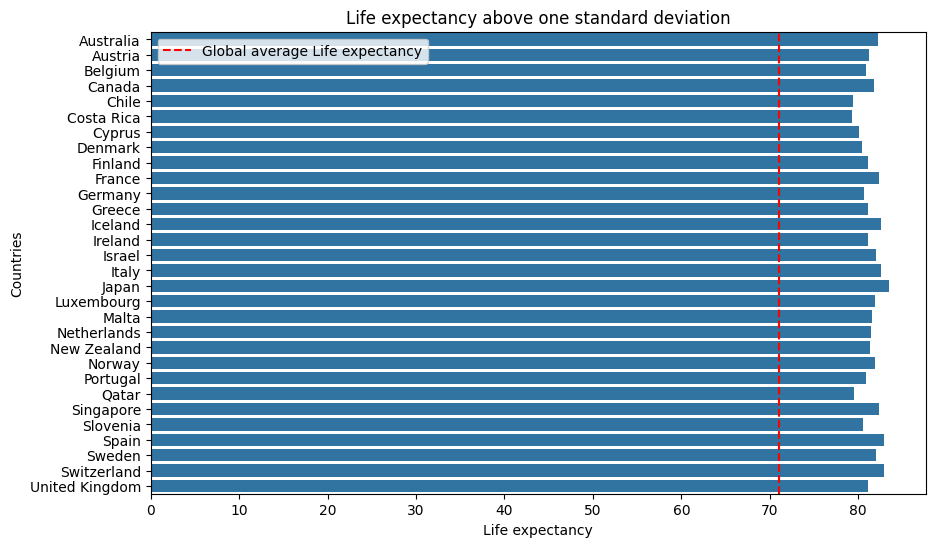

In [223]:
df_life_grouped = df_life.groupby('Country')['Life_expectancy'].mean().reset_index()

mean_life_expectancy = df_life_grouped['Life_expectancy'].mean()
std_dev_life_expectancy = df_life_grouped['Life_expectancy'].std()
above_std_dev_countries = df_life_grouped[df_life_grouped['Life_expectancy'] > (mean_life_expectancy + std_dev_life_expectancy)]


plt.figure(figsize=(10, 6))
plt.title("Life expectancy above one standard deviation")
sns.barplot(x='Life_expectancy', y='Country', data=above_std_dev_countries)
plt.axvline(x=mean_life_expectancy, color='red', linestyle='--', label='Global average Life expectancy')
plt.ylabel("Countries")
plt.xlabel("Life expectancy")
plt.legend()
plt.show()